In [1]:
# импорт библиотек
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
from tqdm.auto import tqdm
from statsmodels.formula.api import ols 

### Описание датасета

Датасет содержит информацию о различных типах косметических продуктов, включая цену, рейтинг, ингредиенты, входящие в состав и т.п.

**Список переменных:**

`Label` - тип продукта

`Brand` - бренд продукта

`Name` - название продукта

`Price` - цена продукта

`Rank` - рейтинг продукта

`Ingredients` - ингредиенты, входящие в состав

`Combination` - 1 - продукт подходит для любого типа кожи, т.е универсаллен, 0 - продукт не универсален

`Dry` - 1 - продукт подходит для сухой кожи, 0 - не подходит

`Normal` - 1 - продукт подходит для нормальной кожи, 0 - не подходит

`Oily` - 1 - продукт подходит для жирной кожи, 0 - не подходит

`Sensitive` - 1 - продукт подходит для чувствительной кожи, 0 - не подходит

### Импорт и базовая предобработка датасета

In [2]:
df = pd.read_csv(r'C:\Users\anyur\cosmetics.csv')
df.head(3)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0


In [3]:
# сделаем первые буквы в названиях переменных строчными, так к ним удобнее обращаться
df.columns = [variable.lower() for variable in df.columns]
df.head(3)

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0


In [4]:
df.shape

(1472, 11)

Проверим, есть ли в датафрейме пропущенные значения:

In [5]:
df.apply(lambda variable: variable.isna().sum(), axis = 0)

label          0
brand          0
name           0
price          0
rank           0
ingredients    0
combination    0
dry            0
normal         0
oily           0
sensitive      0
dtype: int64

Круто, пропущенных значений в данных нет!

### Описательные статистики

Описательные статистики стоят на 3 китах - мера центральной тенденции, мера разбраса и характер распределения. Посмотрим на них там, где это возможно.

В датафрейме есть 2 количесвенные переменные, посмотрим их базовые описательные статистики (меры центральной тенденции: среднее арифметическое и медиана, мера разброса - стандартное отклонения) для каждого типа продукта:

In [6]:
labels = df.groupby('label') \
    .agg({'price': ['count', np.mean, np.median, np.std], 'rank': [np.mean, np.median, np.std]})

label = labels['rank'].rename(columns = {'mean': 'mean_rank', 'median': 'median_rank', 'std': 'std_rank'})
price = labels['price'].rename(columns = {'mean': 'mean_price', 'median': 'median_price', 'count': 'amount_of_items', 'std': 'std_price'})

labels = price.merge(label, left_index = True, right_index = True) \
    .sort_values('mean_rank', ascending = False).round(2)

labels

,amount_of_items,mean_price,median_price,std_price,mean_rank,median_rank,std_rank
label,,,,,,,
Cleanser,281,32.60,28.0,18.14,4.31,4.4,0.65
Moisturizer,298,69.09,50.0,50.84,4.24,4.3,0.51
Treatment,248,79.18,64.5,54.56,4.22,4.3,0.47
Face Mask,266,42.62,36.0,40.86,4.17,4.3,0.71
Sun protect,170,45.91,38.0,30.81,4.05,4.1,0.65
Eye cream,209,63.60,52.0,42.06,3.81,3.9,0.69


Те же статистики можно посмотреть и для каждого бренда:

In [7]:
labels = df.groupby('brand') \
    .agg({'price': ['count', np.mean, np.median, np.std], 'rank': [np.mean, np.median, np.std]})

label = labels['rank'].rename(columns = {'mean': 'mean_rank', 'median': 'median_rank', 'std': 'std_rank'})
price = labels['price'].rename(columns = {'mean': 'mean_price', 'median': 'median_price', 'count': 'amount_of_items', 'std': 'std_price'})

labels = price.merge(label, left_index = True, right_index = True) \
    .sort_values('amount_of_items', ascending = False).round(2)

labels.head(3)

,amount_of_items,mean_price,median_price,std_price,mean_rank,median_rank,std_rank
brand,,,,,,,
CLINIQUE,79,32.59,28.0,14.21,4.12,4.2,0.60
SEPHORA COLLECTION,66,9.68,6.0,8.80,4.22,4.4,0.76
SHISEIDO,63,71.86,60.0,60.92,4.20,4.3,0.65


Иногда стандартные отклонения не считается, т.к у этого бренда есть только одна строка в датафрейме. Все другие описательные статистики в данном случае также не валидны.

Также интересно посмотреть на распределения количественных переменных - это важно с точки зрения статистического анализа, т.к поможет визуально обнаружить выбросы, если они есть, и даст представление о характере рапределения.

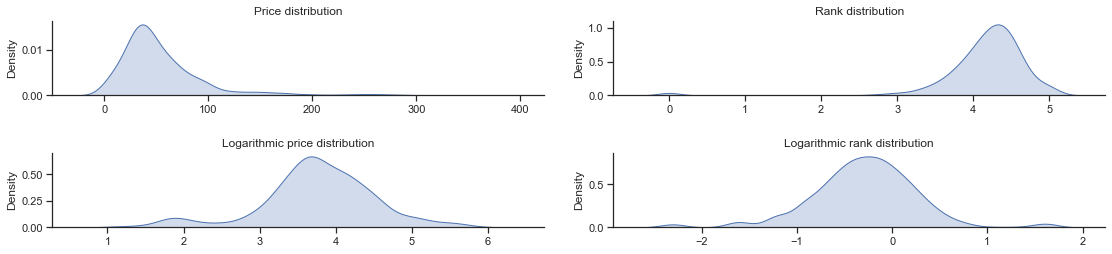

In [9]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 'figure.figsize': (16, 4)}
sns.set_theme(style = "ticks", rc = custom_params)

fig, axs = plt.subplots(2,2) 
sns.kdeplot(df.price, fill = True, ax = axs[0, 0])
sns.kdeplot(np.log(df.price), fill = True, ax = axs[1, 0])
axs[0, 0].set_title('Price distribution')
axs[1, 0].set_title('Logarithmic price distribution')
axs[0, 1].set_title('Rank distribution')
axs[1, 1].set_title('Logarithmic rank distribution')
sns.kdeplot(df['rank'], fill = True, ax = axs[0, 1])
sns.kdeplot(np.log(df['rank'].max() - df['rank']), fill = True, ax = axs[1, 1])
axs[0, 1].set_title('Rank distribution')
axs[0, 0].set_xlabel('')
axs[0, 1].set_xlabel('')
axs[1, 1].set_xlabel('')
axs[1, 0].set_xlabel('')
fig.tight_layout(pad=2)
plt.show()

В обоих распределениях есть выбросы: цена скошена вправо, а рейтинг влево из-за наличия выбросов. Тем не менее, никаких содержательных оснований для чистки таких выбросов нет, т.к они не имеют характера аномалий - цена действительно может быть намного выше чем в среднем, а нулевой рейтинг - тоже рейтинг. Кроме того, мы можем получить логнормальные распределения, взяв натуральный логарифм от значений переменной. Это может быть полезно в некоторых случаях, например, если переменные включаются в предсказательную модель (линейную регрессию, к примеру).

### Поиск инсайтов в данных

Итак, в первую очередь меня интересуют 2 количественные переменные, имеющиеся в датасете - цена и рейтинг. Имеется ли между ними какая-либо взаимосвязь? Для ответа на этот вопрос я собираюсь предпринять следующие действия:

1) Визуально сравнить колебания этих переменных. Для этого я сначала центрирую, а затем нормирую значения этих переменных (т.н z-стандартизация), чтобы получить одинаковую размерность данных, а затем построю лайнчарт с графиками этих переменных

2) Количественно оценю силу взаимосвязи. Тут можно было бы расчитать коэф. корреляции, но зачем, если парная линейная регрессия может дать нам ту же самую информацию, и даже больше? Поэтому я сразу построю модель линейной регрессии и посмотрю на регрессионные статистики

3) Результаты парной линейной регрессии легко визуализировать через скаттерплот, поэтому я построю его

Главные регрессионные статистики я отображу на том же скаттерплоте, чтобы не загромождать тетрадку множествои распечаток.

In [10]:
# я знаю что есть функция zscore, но у меня есть своя
def z_standartization(variable):
    
    '''Функция принимает питоновский лист, нампаевский массив или пандосовскую серию, 
    и возвращает стандартизированные значения в виде нампаевского массива или пандосовской серии'''
    
    return (variable - np.mean(variable)) / np.std(variable)

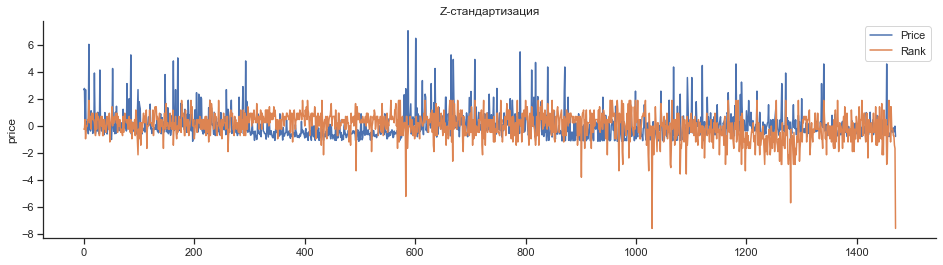

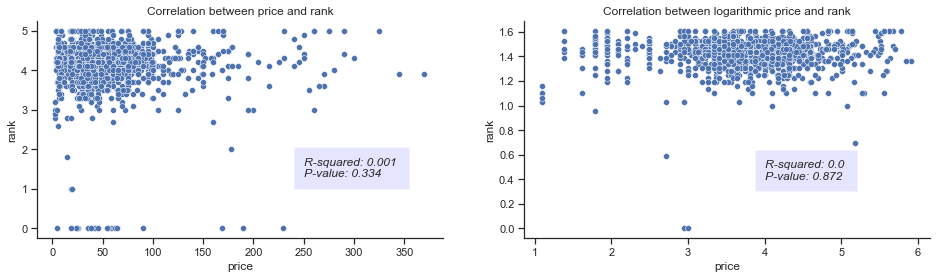

In [11]:
# стандартизируем
price = z_standartization(df[df['rank'] > 0].price)
rank = z_standartization(df[df['rank'] > 0]['rank'])

# визуализируем
sns.lineplot(x = df[df['rank'] > 0].index, y = price)
sns.lineplot(x = df[df['rank'] > 0].index, y = rank)
plt.title('Z-стандартизация')
plt.legend(['Price', 'Rank'])
plt.show()

# регрессионная модель 1
model1 = ols('rank ~ price', df).fit()

# регрессионная модель 2 на логарифмированных переменных
data = df.assign(rank_log = np.log(df[df['rank'] > 0]['rank']), price_log = np.log(df[df['rank'] > 0].price))
model2 = ols('rank_log ~ price_log', data).fit()

# визуализируем
fig, axs = plt.subplots(1,2) 
sns.scatterplot(df['price'], df['rank'], ax = axs[0])
sns.scatterplot(np.log(df['price']), np.log(df['rank']), ax = axs[1])
axs[0].set_title('Correlation between price and rank')
axs[0].text(250, 1.3, f'R-squared: {round(model1.rsquared, 3)} \nP-value: {round(model1.f_pvalue, 3)}''', style = 'oblique',
                bbox = {'facecolor': 'blue', 'alpha': 0.1, 'pad': 10})
axs[1].set_title('Correlation between logarithmic price and rank')
axs[1].text(4, 0.4, f'R-squared: {round(model2.rsquared, 3)} \nP-value: {round(model2.f_pvalue, 3)}''', style = 'oblique',
                bbox = {'facecolor': 'blue', 'alpha': 0.1, 'pad': 10})
plt.show()

**Интерпретация результатов:**

Статистически значимой взаимосвязи между ценой и рейтингом не выявлено, поэтому детальная интерпретация регрессионных статистик не имеет содержательного смысла :(

По всей видимости, оценка рейтинга учитывает цену ("для такой цены отличный товар" и т.п), поэтому связи нет, даже на логарифмированных переменных.

Далее я хотела бы проверить несколько гипотез.

В датасете есть 5 переменных, фиксирующих, для какого типа кожи подходит продукт. Меня интересует, существуют ли статистически значимые различия в цене и рейтинге между 2 группами товаров - теми, которые подходят для определенного типа кожи и теми, которые не подходят. К примеру, меня интересует, различается ли среднее значение цены и рейтинга для товаров, которые подходят для чувствительной кожи и теми, которые не подходят, и далее аналогично для всех других типов кожи. Я буду использовать как параметрику (т-тест), так и непараметрику (тест Мана-Уитни), также я построю распределения цены и боксплоты для наглядного представления различий.

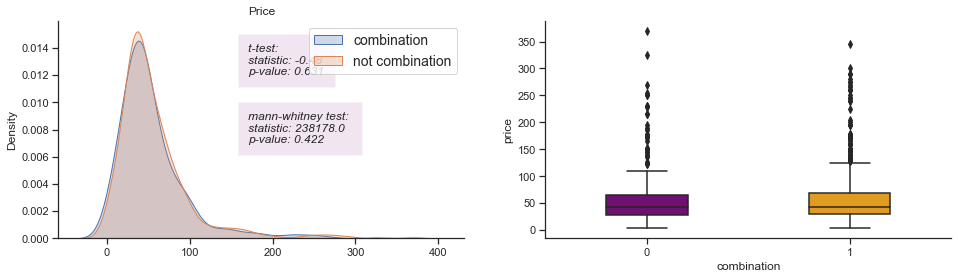

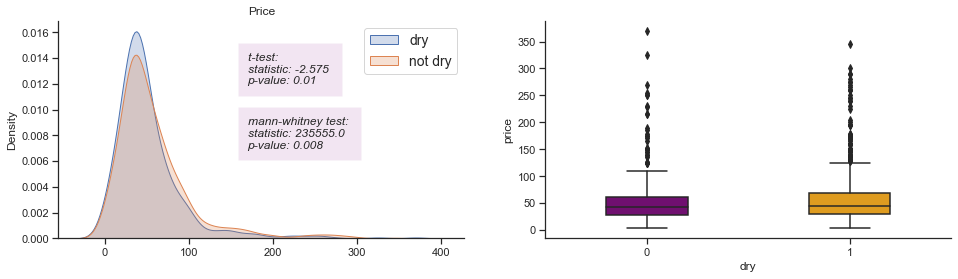

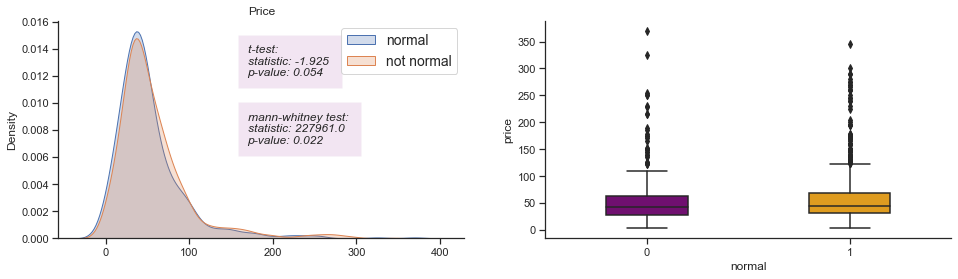

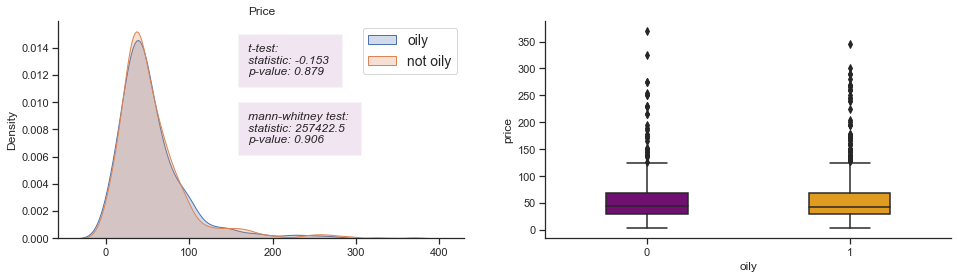

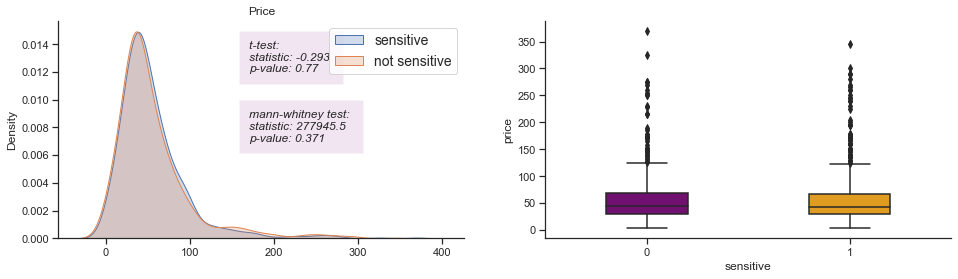

In [12]:
for i in range(5):
    
    # подготовим данные
    columns = df.columns[6:]
    data_0 = df[df[columns[i]] == 0]
    data_1 = df[df[columns[i]] == 1]
    
    # проведем статистические тесты
    ttest_stat, ttest_pval = st.ttest_ind(data_0.price, data_1.price, equal_var = False, alternative = 'two-sided')
    mu_stat, mu_pval = st.mannwhitneyu(data_0.price, data_1.price, alternative = 'two-sided')
    
    # нарисуем
    fig, axs = plt.subplots(1,2) 
    sns.kdeplot(data_0.price, fill = True, ax = axs[0])
    sns.kdeplot(data_1.price, fill = True, ax = axs[0])
    sns.boxplot(data = df, x = columns[i], y = 'price', dodge=False, ax = axs[1], width = 0.4, palette = ['purple', 'orange'])
    axs[0].set_title('Price')
    axs[0].set_xlabel('')
    axs[0].legend([f'{columns[i]}', f'not {columns[i]}'], prop={'size': 14})
    axs[0].text(170, 0.012, f'''t-test: \nstatistic: {round(ttest_stat, 3)} \np-value: {round(ttest_pval, 3)}''', style = 'oblique',
                bbox = {'facecolor': 'purple', 'alpha': 0.1, 'pad': 10})
    axs[0].text(170, 0.007, f'''mann-whitney test: \nstatistic: {round(mu_stat, 3)} \np-value: {round(mu_pval, 3)}''', style = 'oblique',
                bbox = {'facecolor': 'purple', 'alpha': 0.1, 'pad': 10})

**Результаты:**

В нескольких случаях стат. значимые различия были обнаружены, а именно:
- Продукты для сухой кожи стоят стат. значимо больше
- Продукты для нормальной кожи стоят стат. значимо больше (ориентируюсь на тест Мана-Уитни, т.к распределения отклоняются от нормального)

Видимо, людям с сухой и нормальной кожей косметика обходится немного дороже.

Цены на универсальные продукты, а также на продукты для жирной и чувствительной кожи не различаются. 

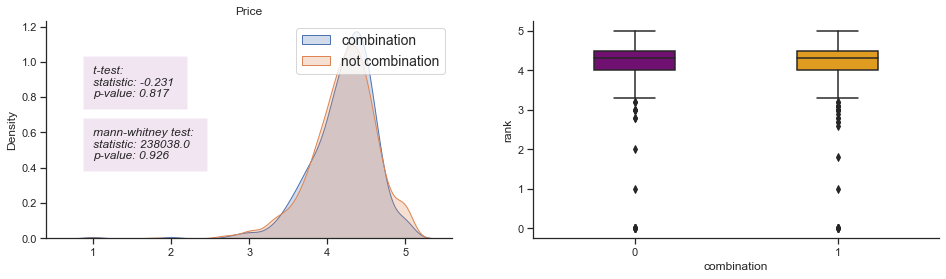

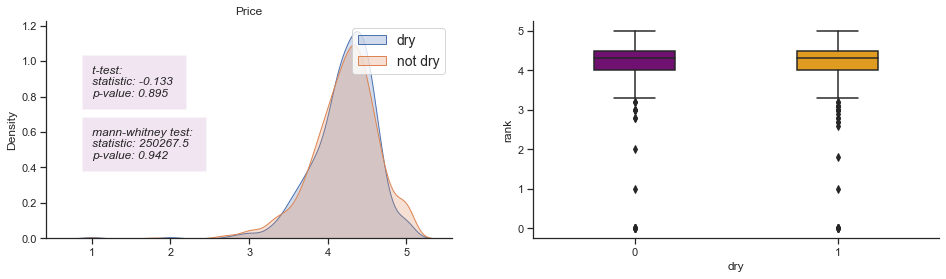

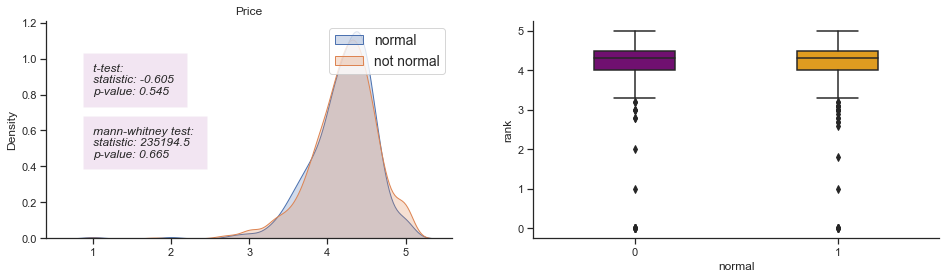

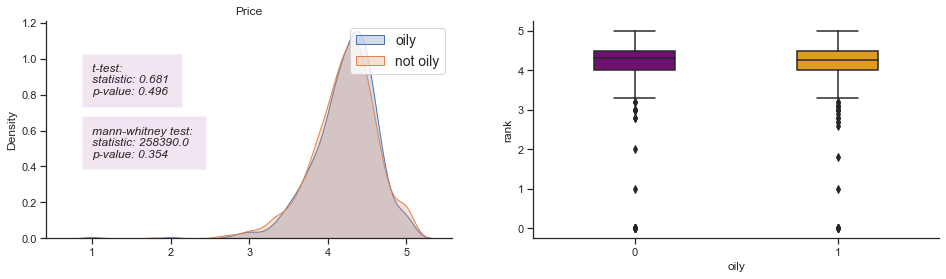

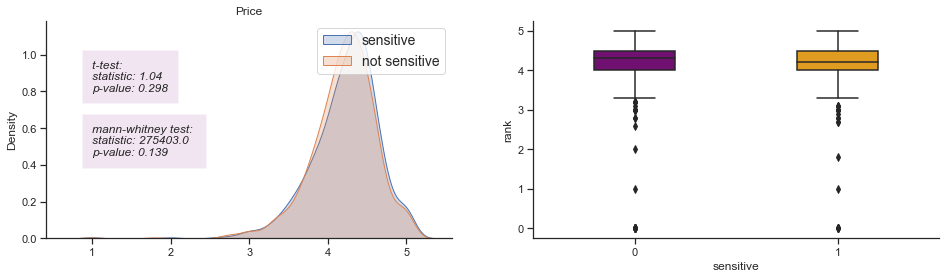

In [13]:
for i in range(5):
    
    # подготовим данные
    columns = df.columns[6:]
    data_0 = df[(df[columns[i]] == 0) & (df['rank'] > 0)]
    data_1 = df[(df[columns[i]] == 1) & (df['rank'] > 0)]
    
    # проведем статистические тесты
    ttest_stat, ttest_pval = st.ttest_ind(data_0['rank'], data_1['rank'], equal_var = False, alternative = 'two-sided')
    mu_stat, mu_pval = st.mannwhitneyu(data_0['rank'], data_1['rank'], alternative = 'two-sided')
    
    # нарисуем
    fig, axs = plt.subplots(1,2) 
    sns.kdeplot(data_0['rank'], fill = True, ax = axs[0])
    sns.kdeplot(data_1['rank'], fill = True, ax = axs[0])
    sns.boxplot(data = df, x = columns[i], y = 'rank', dodge=False, ax = axs[1], width = 0.4, palette = ['purple', 'orange'])
    axs[0].set_title('Price')
    axs[0].set_xlabel('')
    axs[0].legend([f'{columns[i]}', f'not {columns[i]}'], prop={'size': 14})
    axs[0].text(1, 0.8, f'''t-test: \nstatistic: {round(ttest_stat, 3)} \np-value: {round(ttest_pval, 3)}''', style = 'oblique',
                bbox = {'facecolor': 'purple', 'alpha': 0.1, 'pad': 10})
    axs[0].text(1, 0.45, f'''mann-whitney test: \nstatistic: {round(mu_stat, 3)} \np-value: {round(mu_pval, 3)}''', style = 'oblique',
                bbox = {'facecolor': 'purple', 'alpha': 0.1, 'pad': 10})

**Результаты:**

Стат. значимых различий тут нет, рейтинг продуктов для разных типов кожи стат. значимо не различается.

Так же в данных есть колонка, в которой перечислены все ингредиенты, входящие в состав продукта. Мне было бы интересно ответить на следущий вопрос - связано ли наличие того или иного ингридиента с ценой и рейтингом? Иными словами - можно ли утверждать, что отдельно взятый ингредиент связан с ценой (по сути, влияет на цену). 

Технически ответить на такой вопрос сложновато, т.к для каждого продукта мы имеем список ингредиентов в одной колонке. Чтобы работать с каждым ингредиентом отдельно, нужно как-то достать их из колонки.

Ок, достанем уникальные ингредиенты из всего датасета:

In [14]:
# сюда сложим все уникальные ингредиенты для всех товаров датасета
uniq_ingredients = []

# бежим по каждой строке датафрейма
for value in range(len(df)):
    
    # вытаскиваем список ингредиентов для отдельного товара
    lst = df['ingredients'][value].split(',')
    lst = [i.strip().lower() for i in lst]
    
    # бежим по списку всех ингредиентов отдельного товара
    for ingredient in lst:
        
        # если ингредиент еще не включен в наш список, то включаем
        if ingredient not in uniq_ingredients:
            uniq_ingredients.append(ingredient)

Посмотрим, сколько уникальных ингредиентов набралось

In [15]:
len(uniq_ingredients)

6157

Теперь мы можем обогатить наш датафрейм - для каждого уникального ингредиента создать отдельную колонку и на время заполнить их nan'ами.

In [16]:
for ingredient in uniq_ingredients:
    df[ingredient] = np.nan

In [17]:
df.shape

(1472, 6168)

Датафрейм стал немножко пошире.

Теперь мы можем заполнить колонки - будем ставить единицу в колонке ингредиента, если этот ингредиент содержится в строке этого товара.

**ВАЖНО:** на моем компьютере этот вложенный цикл работаеет около **20 минут**. Я понимаю, что можно сделать быстрее, если использовать нампаевский массив, но я не смогла придумать, как это сделать :(

In [18]:
# бежим по каждой строке датафрейма
for row in tqdm(range(len(df))):
    
    # вытаскиваем список ингредиентов для отдельного товара
    lst = df['ingredients'][row].split(',')
    lst = [i.strip().lower() for i in lst]

    # если ингредиент есть в списке ингредиентов этого товара, то ставим единицу
    for ingredient in uniq_ingredients:
        
        if ingredient in lst:
            df[ingredient][row] = 1

  0%|          | 0/1472 [00:00<?, ?it/s]

In [19]:
df = df.fillna(0)

Посмотрим, что получилось

In [20]:
df[uniq_ingredients].head(3)

,algae (seaweed) extract,mineral oil,petrolatum,glycerin,isohexadecane,microcrystalline wax,lanolin alcohol,citrus aurantifolia (lime) extract,sesamum indicum (sesame) seed oil,eucalyptus globulus (eucalyptus) leaf oil,...,chlorhexidine digluconate. [+/-: iron oxides (ci 77491,-pepha® (derived from watermelon extract): protects skin cells against daily stress. - vitasource™ and dglyage®: firm the appearance of skin,support elasticity,and fight wrinkles. -light-diffusing spheres: provide a professionally retouched look.,lentinus edodes extract,sodium lignosulfonate,sodium carboxyethylsilanetriol,ozonized oryza sativa (rice) callus culture extract,methylcellulose,visit the dermaflash boutique
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


В итоге мы имеем 6157 дамми переменных, каждая из которых фиксирует наличие определенного ингредиента в составе продукта. Теперь мы можем посчитать, как наличие каждого ингредиента связано с ценой и рейтингом. Для этого посчитаем корреляции между ценой/рейтингом и каждым ингредиентом. Поскольку нам нужно посчитать корреляцию между количественной и категориальной переменными, корреляции Пирсона, Спирмана или Кендалла не подойдет, и я буду рассчитвать Point biserial Correlation. Больше об этом методе можно прочитать [тут](https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365#:~:text=A%20simple%20approach%20could%20be,variance%20of%20the%20continuous%20variable.), документация используемой дальше функции [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pointbiserialr.html)

In [21]:
correlations = df[uniq_ingredients].apply(lambda ingredient: st.pointbiserialr(df.price, ingredient), axis = 0)

correlations = correlations.transpose().rename(columns = {0: 'coef', 1: 'p-value'}) \
    .sort_values('coef', ascending = False).round(2)

correlations

,coef,p-value
eucalyptus globulus (eucalyptus) leaf oil,0.41,0.0
tocopheryl succinate,0.41,0.0
medicago sativa (alfalfa) seed powder,0.41,0.0
prunus amygdalus dulcis (sweet almond) seed meal,0.40,0.0
sodium gluconate,0.40,0.0
...,...,...
peg-60 hydrogenated castor oil,-0.10,0.0
arginine,-0.10,0.0
hydroxyacetophenone,-0.12,0.0
1,-0.15,0.0


<AxesSubplot:xlabel='coef', ylabel='Density'>

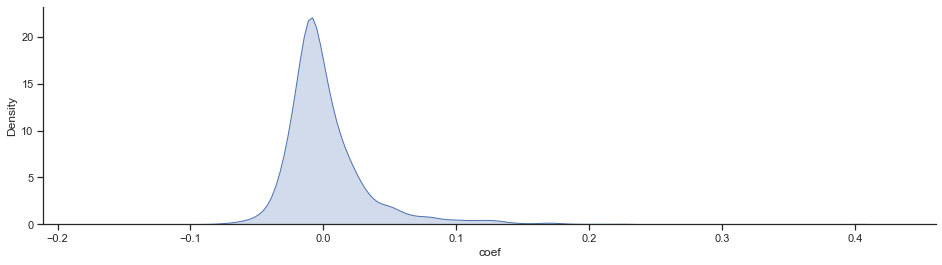

In [22]:
sns.kdeplot(correlations.coef, fill = True)

Большинство ингредиентов никак не коррелируют с ценой, но встречаются ингредиенты, наличие которых имеет связь с ценой. К примеру, продукт, в состав которого входит eucalyptus globulus (eucalyptus) leaf oil или tocopheryl succinate будет стоить дороже. А вот продукт, в состав которого входит 2-hexanediol или hydroxyacetophenone будет стоить дешевле. 

Теперь посмотрим, есть ли связь между наличием того или иного ингредиента и рейтингом продукта:

In [23]:
correlations_rank = df[uniq_ingredients].apply(lambda ingredient: st.pointbiserialr(df['rank'], ingredient), axis = 0)

correlations_rank = correlations_rank.transpose().rename(columns = {0: 'coef', 1: 'p-value'}) \
    .sort_values('coef', ascending = False).round(2)

correlations_rank

,coef,p-value
glycol distearate,0.07,0.01
disodium cocoamphodiacetate,0.06,0.01
hordeum vulgare seed extract,0.06,0.02
yeast polysaccharides,0.06,0.02
vitis vinifera (grape) fruit cell extract,0.06,0.03
...,...,...
acacia dealbata flower/stem extract,-0.17,0.00
disodium lauroamphodiacetate,-0.17,0.00
sorbic acid. *pitera™.,-0.17,0.00
nutritious vitality8 egy lot int m division: el (estee lauder)ingredients: water,-0.17,0.00


<AxesSubplot:xlabel='coef', ylabel='Density'>

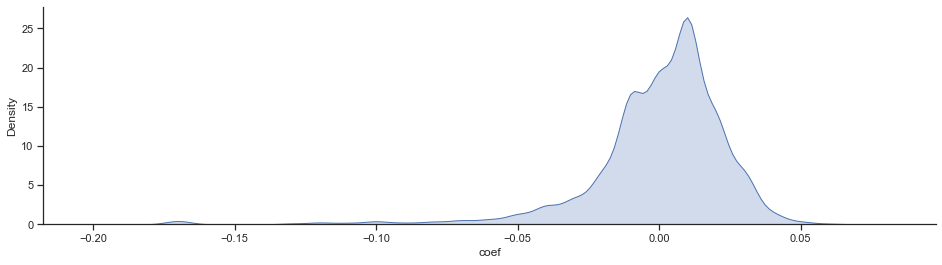

In [24]:
sns.kdeplot(correlations_rank.coef, fill = True)

На мой взгляд, нет ингредиентов, которые положительно связаны с рейтингом (корреляция 0.07 это маловато), но есть некоторые ингредиенты, которые все же имеют слабую отрицательную связь с рейтингом. К примеру, наличие в составе продукта peg-12 dimethicone связано с низким рейтингом.

### Выводы

* Цена продукта и рейтинг продукта никак не взаимосвязаны
* Продукты для сухой и нормальной кожи в среднем имеют более высокую цену, чем продукты, не подходящие для этих типов кожи
* Средний рейтинг товаров для разных типов кожи никак не отличается
* Мы выяснили, какие ингредиенты, входящие в состав продуктов, связаны с высокой ценой, а какие с низкой
* Мы выяснили, какие ингредиенты, входящие в состав продуктов, связаны с низким рейтингом
